In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Base url
base_url = 'https://paper-api.alpaca.markets'

In [6]:
# Fetch current BTC price (in USD not CAD)
btc_response_data = requests.get(btc_url).json()
price_btc = btc_response_data['data']['1']['quotes']['USD']['price']
price_btc

19888.21

In [7]:
# Fetch current ETH price (in USD not CAD)
eth_response_data = requests.get(eth_url).json()
price_eth = eth_response_data['data']['1027']['quotes']['USD']['price']
price_eth 

1076.53

In [8]:
# Compute current value of my crpto
value_btc = my_btc*price_btc
value_eth = my_eth*price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${value_btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${value_eth:0.2f}")

The current value of your 1.2 BTC is $23865.85
The current value of your 5.3 ETH is $5705.61


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

# Pass to shares dataframe
shares_data = {
    "shares": [my_agg, my_spy]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [10]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv('Api_Key')
alpaca_secret_key = os.getenv('Secret_Key')


# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [11]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [12]:
print(alpaca_api)

In [13]:
# Confirm login/Obtain account information
# account = alpaca_api.get_account()
# print(account)

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2022-07-11", tz="America/New_York").isoformat()


In [15]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [16]:
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [17]:
# Get current closing prices for AGG and SPY
df_portfolio = alpaca_api.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Display Closing Prices
display(df_portfolio)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-11 04:00:00+00:00,101.67,101.92,101.6029,101.70,5758310,17084,101.720884,AGG
2022-07-11 04:00:00+00:00,385.91,386.87,383.5000,384.23,58100363,473423,384.871994,SPY


In [27]:
# Reorganize the DataFrame
# Remove unwanted columns
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Display Reorganized Dataframe
display(AGG)
display(SPY)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-07-11 04:00:00+00:00,101.67,101.92,101.6029,101.7,5758310,17084,101.720884


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-07-11 04:00:00+00:00,385.91,386.87,383.5,384.23,58100363,473423,384.871994


In [28]:
# Concatenate the ticker DataFrames
df_portfolio_cleaned = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
display(df_portfolio_cleaned)

AGG                                    \
                             open    high       low  close   volume   
timestamp                                                             
2022-07-11 04:00:00+00:00  101.67  101.92  101.6029  101.7  5758310   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2022-07-11 04:00:00+00:00       17084  101.720884  385.91  386.87  383.5   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-11 04:00:00+00:00  384.23  58100363      473423  384.871994

In [29]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio_cleaned["AGG"]["close"])
spy_close_price = float(df_portfolio_cleaned["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $101.7
Current SPY closing price: $384.23


In [30]:
# Compute the current value of shares
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

In [31]:
# Print the current value of the stocks portfolio
print(f"The current portfolio value of your {df_shares.loc['AGG']['shares']} AGG shares is ${my_agg_value:0.2f}")
print(f"The current portfolio value of your {df_shares.loc['SPY']['shares']} SPY shares is ${my_spy_value:0.2f}")

The current portfolio value of your 200 AGG shares is $20340.00
The current portfolio value of your 50 SPY shares is $19211.50


### Savings Health Analysis

In [35]:
# Set monthly household income
monthly_income=12000

# Calculate Total Values
crypto=value_btc + value_eth
stock_bond=my_agg_value + my_spy_value

# Consolidate financial assets data
savings_data= ["crypto", "stock_bond"]

# Create savings DataFrame
df_savings=pd.DataFrame(data=[crypto,stock_bond], index=savings_data, columns=["amount"])


# Display savings DataFrame
display(df_savings)

,amount
crypto,29571.461
stock_bond,39551.500


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

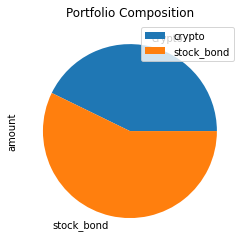

In [36]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Portfolio Composition")

In [49]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_portfolio= float(df_savings.sum())

# Validate saving health
if total_portfolio > emergency_fund:
  print(f"Congratulations {total_portfolio} is enough.")
elif total_portfolio == emergency_fund:
  print(f"Congratulations {total_portfolio} you have reached your goal.")
elif total_portfolio < emergency_fund:
  print(f"You only have {total_portfolio}. You need emergency_fund-total_portfolio > to reach your goal.")

Congratulations 69122.961 is enough.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [53]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-07-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-11', tz='America/New_York').isoformat()

In [54]:
# Get 5 years' worth of historical data for SPY and AGG
df_MC5 = alpaca_api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display Closing Prices
display(df_MC5)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-07-11 04:00:00+00:00,108.97,109.1000,108.930,109.05,1969064,8640,109.025192,AGG
2017-07-12 04:00:00+00:00,109.38,109.4300,109.260,109.38,2129850,8686,109.342204,AGG
2017-07-13 04:00:00+00:00,109.29,109.3118,109.130,109.26,1568304,8104,109.224824,AGG
2017-07-14 04:00:00+00:00,109.54,109.5600,109.290,109.37,1916631,9255,109.398524,AGG
2017-07-17 04:00:00+00:00,109.40,109.4800,109.320,109.42,4078495,11508,109.417708,AGG
...,...,...,...,...,...,...,...,...
2022-07-05 04:00:00+00:00,376.00,381.9800,372.900,381.96,79887221,645359,377.447552,SPY
2022-07-06 04:00:00+00:00,382.07,385.8700,379.600,383.25,69844126,614420,382.508286,SPY
2022-07-07 04:00:00+00:00,385.12,389.8300,383.267,388.99,64172156,467708,387.621834,SPY


In [ ]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")